# Importar Bibliotecas Necesarias
Vamos a importar todas las bibliotecas necesarias para trabajar con los datos que obtenemos de la API de Twitter y para manipular esos datos en el formato adecuado. Esto incluye bibliotecas para manejar JSON, realizar solicitudes HTTP y trabajar con bases de datos SQLite

A continuación, definimos las rutas de los archivos en los cuales vamos a trabajar. Esto incluye la ubicación del archivo que contiene las credenciales para acceder a la API de Twitter, y las rutas donde guardaremos los datos obtenidos en formato CSV para su posterior análisis.

In [1]:
import json  # Para manejar datos en formato JSON
import pandas as pd  # Para el manejo y análisis de datos en tablas (DataFrames)
import requests  # Para realizar solicitudes HTTP y obtener datos de la web
import os  # Para interactuar con el sistema operativo (manejo de archivos y rutas)
import tweepy  # Para interactuar con la API de Twitter
import re  # Para trabajar con expresiones regulares y buscar patrones en textos
import sqlite3  # Para trabajar con bases de datos SQLite
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from textblob import TextBlob
from gensim.models import Word2Vec
# Descargar los stopwords de NLTK (si no lo has hecho previamente)
nltk.download('stopwords')
# Definir las rutas a los archivos que se utilizarán
local_path = os.getcwd()

file_path = local_path + r"\Twitter_API.json"  # Ruta del archivo JSON con credenciales de la API de Twitter
file_path_csv = local_path + r"\Twitter_API.csv"  # Ruta de archivo CSV donde se guardarán los datos obtenidos
csv_path = local_path + r"\tweets_data.csv"  # Ruta del archivo CSV donde se almacenarán los tweets procesados
db_path =local_path +  r"\tweets_data.db"  # Ruta de la base de datos SQLite donde se almacenarán los tweets procesados
images_path = local_path + r'\Visualizaciones' # Ruta donde se guardarán las imágenes generadas

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Extracción

En esta sección del código, vamos a configurar las credenciales para autenticarnos con la API de Twitter. Posteriormente, realizaremos una búsqueda de tweets utilizando un término clave y obtendremos los resultados para almacenarlos en un archivo JSON. Esto implica tanto la autenticación como la búsqueda y el almacenamiento de datos de la API.

### Configuración de credenciales: 
Necesitamos las claves de autenticación que nos proporciona Twitter para poder acceder a su API y hacer solicitudes para obtener datos.

### Autenticación con la API: 
Usaremos las credenciales para autenticar nuestra aplicación en la API de Twitter, lo que nos permitirá hacer solicitudes y obtener tweets.

### Búsqueda de tweets: 
Realizaremos una búsqueda de tweets usando una palabra clave que puede ser configurada. Estos tweets se guardarán en formato JSON para su posterior análisis.

### Almacenamiento en archivo JSON: 
Finalmente, guardaremos los tweets obtenidos en un archivo JSON en el sistema local.

In [ ]:
# Credenciales de la API

bearer_token = ""

# Autenticación con la API V2 usando el Bearer Token
client = tweepy.Client(bearer_token=bearer_token)

# Palabra clave para buscar tweets
query = "ciencia"  # Cambia esta palabra clave según lo que necesites buscar

# Obtener los últimos 10 tweets que contienen la palabra clave
tweets = client.search_recent_tweets(query=query, max_results=100)  

# Verificar si la API devuelve tweets
if tweets.data:
    print(f"Se encontraron {len(tweets.data)} tweets sobre '{query}'.")
    tweets_data = []

    # Convertir los tweets a un formato JSON
    for tweet in tweets.data:
        tweets_data.append(tweet.data)

    # Guardar los tweets en un archivo JSON
    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump(tweets_data, f, ensure_ascii=False, indent=4)

    print(f"Datos guardados correctamente en {file_path}")
else:
    print(f"No se encontraron tweets sobre '{query}'.")

TooManyRequests: 429 Too Many Requests
Usage cap exceeded: Monthly product cap

# Cargar Archivo JSON
vamos a cargar los datos de los tweets que previamente guardamos en un archivo JSON. Usamos el archivo que se especificó en la ruta file_path para acceder a los datos. Este paso es esencial para poder trabajar con los tweets guardados y realizar cualquier tipo de análisis, procesamiento o visualización de los datos que necesitemos. Básicamente, leemos el archivo y lo almacenamos en una variable para poder manipularlo después.

In [3]:
# Cargar el archivo JSON
with open(file_path, 'r', encoding='utf-8') as file:
    tweets_data = json.load(file)


# Mostrar Contenido del Archivo JSON
extraemos una muestra de los primeros 5 tweets del archivo JSON que hemos cargado previamente. Esto nos permite revisar rápidamente una pequeña parte de los datos para asegurarnos de que la carga se realizó correctamente y poder verificar su formato. Posteriormente, se imprimen estos primeros 5 tweets para su visualización y análisis.

In [4]:
# Obtener una muestra de los primeros 5 tweets del archivo JSON cargado
muestra_datos_json = tweets_data[:5]
print(muestra_datos_json)


[{'id': '1876100685915439469', 'text': 'kakakakakaa eu li o livro dessa música... https://t.co/rEGLJsgtse', 'edit_history_tweet_ids': ['1876100685915439469']}, {'id': '1876100683700809772', 'text': '@Tavape7 @eduardomenoni @FabiolaPg5 🫠Aquí está tu mierda de disque música 🤢🤮🤮\nhttps://t.co/KS9nhSjx96', 'edit_history_tweet_ids': ['1876100683700809772']}, {'id': '1876100682870329685', 'text': '@wowonderder Que música é essa???', 'edit_history_tweet_ids': ['1876100682870329685']}, {'id': '1876100681469485325', 'text': 'RT @CR7Brasil: namoral, tem que ser muito VIADO pra falar que essa musica aqui é ruim', 'edit_history_tweet_ids': ['1876100681469485325']}, {'id': '1876100680467067145', 'text': 'RT @sissygermanotta: Pouco se fala dessa música, mas ela é MUITO boa https://t.co/rSVszl4ewE', 'edit_history_tweet_ids': ['1876100680467067145']}]


# Exploración
En esta sección, simplemente vemos el contenido del primer tweet para revisar algunas de sus claves y valores específicos, como el ID, el historial de edición y el texto del tweet.



In [5]:
if len(tweets_data) > 0:
    print(tweets_data[0].keys()) 

print (tweets_data[0]['edit_history_tweet_ids'])
print (tweets_data[0]['id'])
print (tweets_data[0]['text'])

dict_keys(['id', 'text', 'edit_history_tweet_ids'])
['1876100685915439469']
1876100685915439469
kakakakakaa eu li o livro dessa música... https://t.co/rEGLJsgtse


# Visualizar Datos del JSON
En esta sección, iteramos sobre todos los tweets almacenados y mostramos el ID y el texto de cada tweet, lo que nos permite revisar rápidamente la información principal de todos los tweets cargados.

In [6]:

for i in range(len(tweets_data)):
    print(tweets_data[i]['id'])
    print(tweets_data[i]['text'])
    print (tweets_data[i]['edit_history_tweet_ids'] )

1876100685915439469
kakakakakaa eu li o livro dessa música... https://t.co/rEGLJsgtse
['1876100685915439469']
1876100683700809772
@Tavape7 @eduardomenoni @FabiolaPg5 🫠Aquí está tu mierda de disque música 🤢🤮🤮
https://t.co/KS9nhSjx96
['1876100683700809772']
1876100682870329685
@wowonderder Que música é essa???
['1876100682870329685']
1876100681469485325
RT @CR7Brasil: namoral, tem que ser muito VIADO pra falar que essa musica aqui é ruim
['1876100681469485325']
1876100680467067145
RT @sissygermanotta: Pouco se fala dessa música, mas ela é MUITO boa https://t.co/rSVszl4ewE
['1876100680467067145']
1876100680446025918
RT @pbeilsh: um fato: halley's comet é sim a música mais romântica de toda a carreira da billie https://t.co/Yw32ovvJRn
['1876100680446025918']
1876100679376462279
Esq imagínate sacar un álbum con indirectas para todas tus exs???? completamente loco pero buf espléndida música pa mis oídos 💕💕💕💕
Te adoro badbu🥲
['1876100679376462279']
1876100673852596364
RT @d2mnbfBJt1r8OoU: #音楽

# Transformación y Limpieza

Primero convertimos los datos de los tweets a un DataFrame de Pandas para facilitar su manipulación y análisis. Luego, agrupamos los tweets por su ID y concatenamos los textos en un solo string para cada tweet. A continuación, renombramos las columnas para que sean más comprensibles y mostramos el DataFrame resultante.

Además, definimos una función que extrae el nombre del usuario del retweet (si es que el tweet es un retweet) y aplicamos esta función para crear una nueva columna con los nombres de los usuarios que hicieron los retweets.
 
Después, guardamos los datos agrupados en un archivo CSV para su posterior análisis.


In [7]:
# Convertir los datos a un DataFrame de Pandas
df = pd.json_normalize(tweets_data)
# Agrupar por 'id' y concatenar los textos en un solo string
df_grouped = df.groupby('id')['text'].apply(' '.join).reset_index()
df_grouped.rename(columns={'id': 'tweet_id', 'text': 'tweet_text'}, inplace=True)

# Mostrar el DataFrame resultante
print(df_grouped)

# Función para extraer el nombre del usuario del retweet con el símbolo '@'
def extract_retweet_user(text):
    # Verificar si el texto es un retweet y extraer el nombre del usuario con '@'
    match = re.match(r'RT @(\S+):', text)
    if match:
        return '@' + match.group(1)  # Agregar '@' antes del nombre del usuario
    else:
        return False  # Si no es un retweet, devolver False

# Aplicar la función a la columna 'tweet_text' para generar una nueva columna 'retweet_user'
df_grouped['retweet_user'] = df_grouped['tweet_text'].apply(extract_retweet_user)

# Guardar como un archivo CSV para analizarlo más fácilmente:
df_grouped.to_csv(csv_path, index=False)
# Mostrar el DataFrame con la nueva columna
print(df_grouped)

               tweet_id                                         tweet_text
0   1876100481711505814  RT @Mattlockss: No quiero coger flaco quiero q...
1   1876100481958953449  RT @badbunnynetwork: Bad Bunny ahora en Puerto...
2   1876100482093170783  RT @Re_Villarreal: ¡A trabajar! 💙\nDios del UB...
3   1876100483036979531  RT @ludsexssion: tomara que a numababy se inte...
4   1876100484395942238  a tl rajando essa senhora sem carreira na músi...
..                  ...                                                ...
95  1876100680467067145  RT @sissygermanotta: Pouco se fala dessa músic...
96  1876100681469485325  RT @CR7Brasil: namoral, tem que ser muito VIAD...
97  1876100682870329685                  @wowonderder Que música é essa???
98  1876100683700809772  @Tavape7 @eduardomenoni @FabiolaPg5 🫠Aquí está...
99  1876100685915439469  kakakakakaa eu li o livro dessa música... http...

[100 rows x 2 columns]
               tweet_id                                         tweet_text  

# Conclusión

Después de preprocesar los textos de la columna tweet_text, hemos logrado limpiar los datos y extraer las palabras significativas eliminando las stopwords y la puntuación. La siguiente parte del proceso consiste en contar la frecuencia de las palabras filtradas, lo que nos permite identificar cuáles son las más comunes en los tweets de nuestro conjunto de datos.

En este paso, hemos usado la biblioteca Counter para contar las palabras y obtener las 20 más frecuentes, lo que es útil para identificar patrones recurrentes en los textos. Al realizar este tipo de análisis exploratorio, podemos obtener una visión general de los temas más mencionados o palabras clave en los tweets.


# Revisión de la tabla final
Después de preprocesar los textos, revisamos el DataFrame df_grouped para asegurarnos de que las columnas tweet_text y cleaned_text estén correctamente formateadas y sin valores nulos. Verificamos que la limpieza del texto se haya realizado correctamente y validamos las palabras más comunes, además de revisar las visualizaciones para confirmar que reflejan adecuadamente las palabras frecuentes.

In [8]:
print("df_grouped -\n", df_grouped.dtypes)

df_grouped

df_grouped -
 tweet_id        object
tweet_text      object
retweet_user    object
dtype: object


,tweet_id,tweet_text,retweet_user
0,1876100481711505814,RT @Mattlockss: No quiero coger flaco quiero q...,@Mattlockss
1,1876100481958953449,RT @badbunnynetwork: Bad Bunny ahora en Puerto...,@badbunnynetwork
2,1876100482093170783,RT @Re_Villarreal: ¡A trabajar! 💙\nDios del UB...,@Re_Villarreal
3,1876100483036979531,RT @ludsexssion: tomara que a numababy se inte...,@ludsexssion
4,1876100484395942238,a tl rajando essa senhora sem carreira na músi...,False
...,...,...,...
95,1876100680467067145,RT @sissygermanotta: Pouco se fala dessa músic...,@sissygermanotta
96,1876100681469485325,"RT @CR7Brasil: namoral, tem que ser muito VIAD...",@CR7Brasil
97,1876100682870329685,@wowonderder Que música é essa???,False
98,1876100683700809772,@Tavape7 @eduardomenoni @FabiolaPg5 🫠Aquí está...,False


# Escritura en tablas de BD
Antes de insertar los datos en la base de datos, establecemos la conexión con el archivo de la base de datos utilizando sqlite3.connect(). 

Una vez establecida la conexión, insertamos los datos del DataFrame df_grouped en la tabla correspondiente de la base de datos. Usamos if_exists='replace' para asegurarnos de que si la tabla ya existe, se reemplace con los nuevos datos. Luego, confirmamos los cambios realizados con conn.commit() para que los datos se guarden permanentemente.

In [9]:
conn = sqlite3.connect(db_path)

# Inserción de datos del DataFrame df_noticias en la tabla df_noticias
df_grouped.to_sql('df_grouped', conn, if_exists='replace', index=False)

# Confirmar los cambios 
conn.commit()

# Revisión de escritura en BD
Una vez que los datos han sido insertados en la base de datos, realizamos una consulta SQL para recuperar todos los registros de la tabla df_grouped. Usamos pd.read_sql_query() para ejecutar la consulta y almacenar los resultados en un DataFrame, lo que nos permite trabajar con los datos de la tabla directamente en Python. Finalmente, mostramos los primeros registros de la tabla para verificar que la extracción se haya realizado correctamente y cerramos la conexión a la base de datos con conn.close().

In [10]:
# Consulta SQL para obtener todos los registros de la tabla 'df_grouped'
query_1 = "SELECT * FROM df_grouped"

df_grouped_sql = pd.read_sql_query(query_1, conn)

# Mostrar los primeros registros
print(df_grouped_sql)

conn.close()

               tweet_id                                         tweet_text  \
0   1876100481711505814  RT @Mattlockss: No quiero coger flaco quiero q...   
1   1876100481958953449  RT @badbunnynetwork: Bad Bunny ahora en Puerto...   
2   1876100482093170783  RT @Re_Villarreal: ¡A trabajar! 💙\nDios del UB...   
3   1876100483036979531  RT @ludsexssion: tomara que a numababy se inte...   
4   1876100484395942238  a tl rajando essa senhora sem carreira na músi...   
..                  ...                                                ...   
95  1876100680467067145  RT @sissygermanotta: Pouco se fala dessa músic...   
96  1876100681469485325  RT @CR7Brasil: namoral, tem que ser muito VIAD...   
97  1876100682870329685                  @wowonderder Que música é essa???   
98  1876100683700809772  @Tavape7 @eduardomenoni @FabiolaPg5 🫠Aquí está...   
99  1876100685915439469  kakakakakaa eu li o livro dessa música... http...   

        retweet_user  
0        @Mattlockss  
1   @badbunnynetw

# Visualización de frecuencias

En esta sección, primero preprocesamos el texto de los tweets. Convertimos todo el texto a minúsculas y eliminamos los signos de puntuación para normalizar los datos. Luego, concatenamos todos los textos en un solo corpus y eliminamos las palabras de parada (stopwords) utilizando el conjunto de stopwords de NLTK. Después, contamos la frecuencia de las palabras filtradas y seleccionamos las 20 palabras más comunes.

Finalmente, visualizamos los resultados mediante dos métodos:

Un gráfico de barras que muestra las 20 palabras más frecuentes junto con su frecuencia.
Una nube de palabras (WordCloud) que representa visualmente las palabras más comunes, donde las más frecuentes se muestran con mayor tamaño.
Este proceso nos permite obtener una visión clara de los temas predominantes y las palabras clave en el conjunto de datos de los tweets.

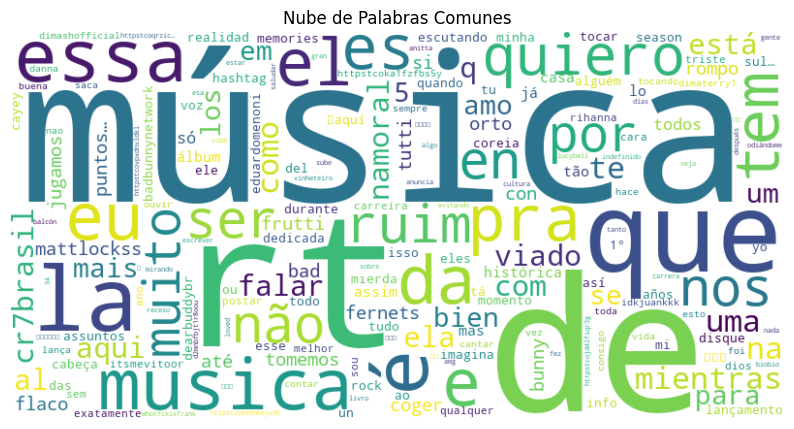

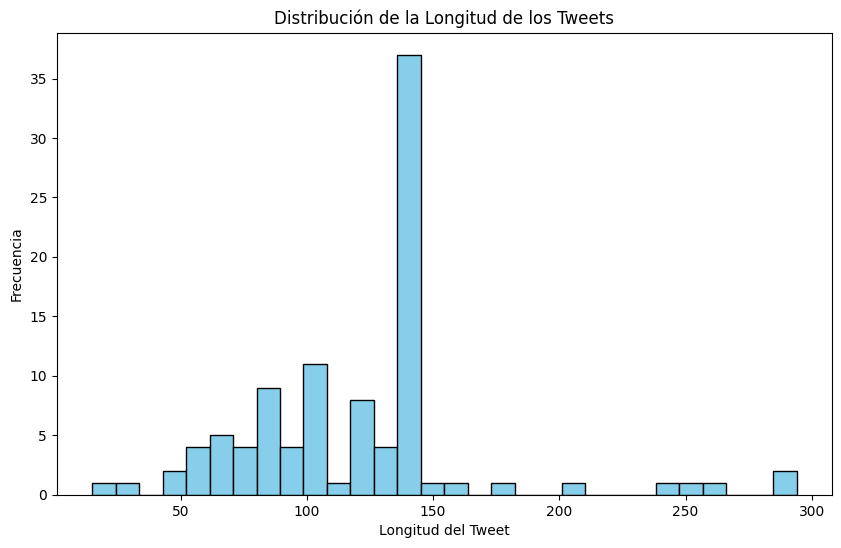

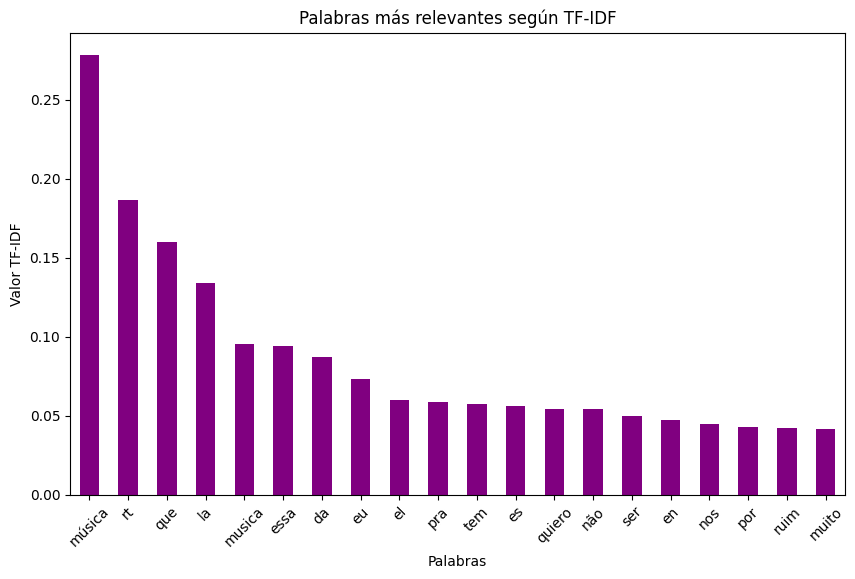

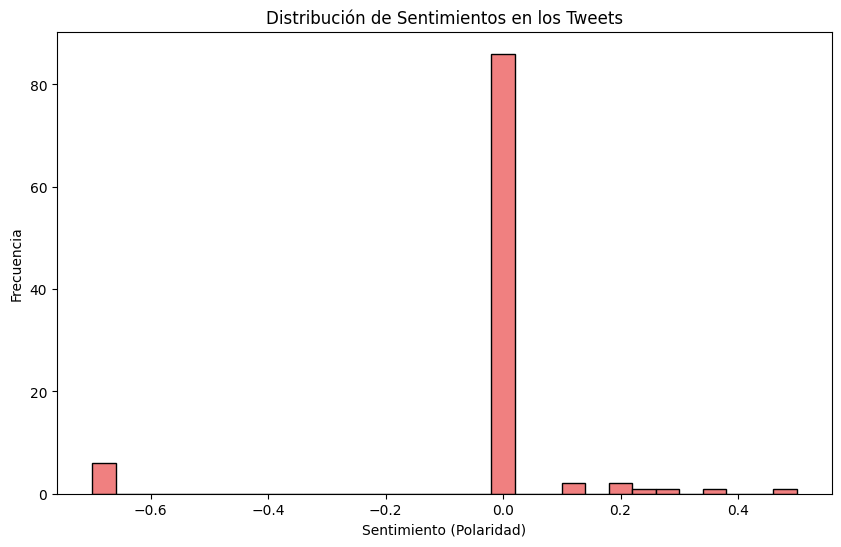

In [11]:
# Definir una función para preprocesar el texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar signos de puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    
    return text

# Preprocesar todos los textos de la columna 'tweet_text'
df_grouped['cleaned_text'] = df_grouped['tweet_text'].apply(preprocess_text)

# Concatenar todos los textos para hacer un solo corpus
all_text = ' '.join(df_grouped['cleaned_text'])

# Eliminar las palabras de parada (stopwords) de NLTK
stop_words = set(stopwords.words('english'))

# Crear una lista de palabras (tokens)
words = all_text.split()

# Filtrar las palabras para eliminar las stopwords
filtered_words = [word for word in words if word not in stop_words]

# Contar la frecuencia de las palabras
word_counts = Counter(filtered_words)

# Verificar si la carpeta existe, si no, crearla
if not os.path.exists(images_path):
    os.makedirs(images_path)

# Crear la nube de palabras (WordCloud)
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate_from_frequencies(word_counts)

# Mostrar y guardar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Comunes')
plt.savefig(os.path.join(images_path, 'wordcloud.png'))  # Guardar imagen
plt.show()

# Calcular la longitud de cada tweet
df_grouped['tweet_length'] = df_grouped['tweet_text'].apply(len)

# Visualizar la distribución de la longitud de los tweets
plt.figure(figsize=(10, 6))
plt.hist(df_grouped['tweet_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Longitud del Tweet')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de los Tweets')
plt.savefig(os.path.join(images_path, 'tweet_length_distribution.png'))  # Guardar imagen
plt.show()

# Usar TF-IDF para obtener las palabras clave
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf.fit_transform(df_grouped['cleaned_text'])

# Crear un DataFrame de las palabras más relevantes
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Obtener las palabras más relevantes
top_tfidf_words = tfidf_df.mean(axis=0).sort_values(ascending=False).head(20)

# Visualizar con un gráfico de barras
plt.figure(figsize=(10, 6))  
top_tfidf_words.plot(kind='bar', color='purple')
plt.title('Palabras más relevantes según TF-IDF')
plt.xlabel('Palabras')
plt.ylabel('Valor TF-IDF')
plt.xticks(rotation=45)
plt.savefig(os.path.join(images_path, 'top_tfidf_words.png'))  # Guardar imagen
plt.show()

# Función para obtener el sentimiento
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Aplicar análisis de sentimientos
df_grouped['sentiment'] = df_grouped['cleaned_text'].apply(get_sentiment)

# Visualizar la distribución de los sentimientos
plt.figure(figsize=(10, 6))
plt.hist(df_grouped['sentiment'], bins=30, color='lightcoral', edgecolor='black')
plt.xlabel('Sentimiento (Polaridad)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sentimientos en los Tweets')
plt.savefig(os.path.join(images_path, 'sentiment_distribution.png'))  # Guardar imagen
plt.show()



